In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

import PV_ICE

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [3]:
print(cwd)

C:\Users\hmirletz\Documents\GitHub\PV_ICE\docs\publications


In [2]:
#print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("pyplot ", plt.matplotlib.__version__)
print("PV_ICE version ", PV_ICE.__version__)

Python version  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.0.3
pyplot  3.7.2
PV_ICE version  


This journal pulls out the silver demand projections for the 3 projected technologies, PERC, TOPCon, SHJ, as projected for the Energy Analysis paper (10a). We also do a literature comparison, since this is a highly studied space.

We pull in the output dataframes from journal 10a and do graphing here.

In [7]:
cc_13scen_yearly_dataOut = pd.read_csv(os.path.join(inputfolder, 'EnergyAnalysis','Deploy_MirletzLinear','cc_13scen_yearly.csv'),
           index_col = 0)

In [19]:
silver_annual_demand = cc_13scen_yearly_dataOut.filter(like='VirginStock_silver') #tonnes
silver_annual_demand_pvice = silver_annual_demand.filter(like='PV_ICE')
silver_annual_demand_perc = silver_annual_demand.filter(like='r_PERC')
silver_annual_demand_topcon = silver_annual_demand.filter(like='r_TOPCon')
silver_annual_demand_shj = silver_annual_demand.filter(like='r_SHJ')


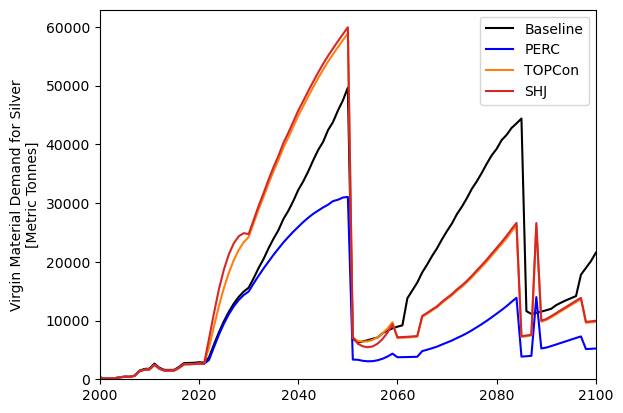

In [36]:
plt.plot(silver_annual_demand_pvice, color='black', label='Baseline')
plt.plot(silver_annual_demand_perc, color = 'tab:blue', label='PERC')
plt.plot(silver_annual_demand_topcon, color='tab:orange', label='TOPCon')
plt.plot(silver_annual_demand_shj, color='tab:red', label='SHJ')
plt.ylim(0,)
plt.xlim(2000,2100)
plt.ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.legend()

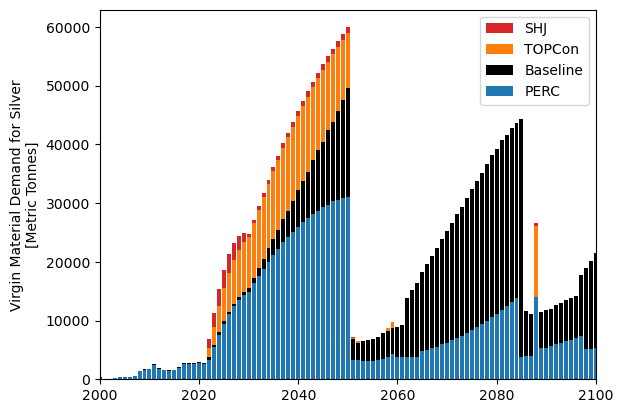

In [40]:
plt.bar(silver_annual_demand_shj.index, silver_annual_demand_shj.iloc[:,0], color='tab:red', label='SHJ')
plt.bar(silver_annual_demand_topcon.index, silver_annual_demand_topcon.iloc[:,0], color='tab:orange', label='TOPCon')
plt.bar(silver_annual_demand_pvice.index, silver_annual_demand_pvice.iloc[:,0], color='black', label='Baseline')
plt.bar(silver_annual_demand_perc.index, silver_annual_demand_perc.iloc[:,0], color='tab:blue', label='PERC')
plt.ylim(0,)
plt.xlim(2000,2100)
plt.ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.legend()

### Add in Literature comparison of projections